In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [3]:
path="../data/diabetes.csv"
diabetes_df=pd.read_csv(path)

### splitting data

In [4]:
from sklearn.model_selection import train_test_split

diabetes_train,diabetes_test=train_test_split(diabetes_df,test_size=0.2,random_state=42)

In [5]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56553 entries, 61789 to 15795
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       56553 non-null  float64
 1   HighBP                56553 non-null  float64
 2   HighChol              56553 non-null  float64
 3   CholCheck             56553 non-null  float64
 4   BMI                   56553 non-null  float64
 5   Smoker                56553 non-null  float64
 6   Stroke                56553 non-null  float64
 7   HeartDiseaseorAttack  56553 non-null  float64
 8   PhysActivity          56553 non-null  float64
 9   Fruits                56553 non-null  float64
 10  Veggies               56553 non-null  float64
 11  HvyAlcoholConsump     56553 non-null  float64
 12  AnyHealthcare         56553 non-null  float64
 13  NoDocbcCost           56553 non-null  float64
 14  GenHlth               56553 non-null  float64
 15  MentHlth            

In [6]:
diabetes_train.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
61789,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0,4.0,6.0
46280,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,2.0
18465,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0,5.0,5.0
45540,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,6.0,7.0
28119,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,2.0,2.0


### Visualizing Age Data

In [7]:
diabetes_train["Age"].describe()

count    56553.000000
mean         8.576769
std          2.852993
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [8]:
age_count=diabetes_train["Age"].value_counts().sort_index()

age_count

Age
1.0      789
2.0     1129
3.0     1635
4.0     2231
5.0     2828
6.0     3713
7.0     5557
8.0     6907
9.0     8018
10.0    8716
11.0    6412
12.0    4295
13.0    4323
Name: count, dtype: int64

In [9]:
labels = ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59",
          "60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]

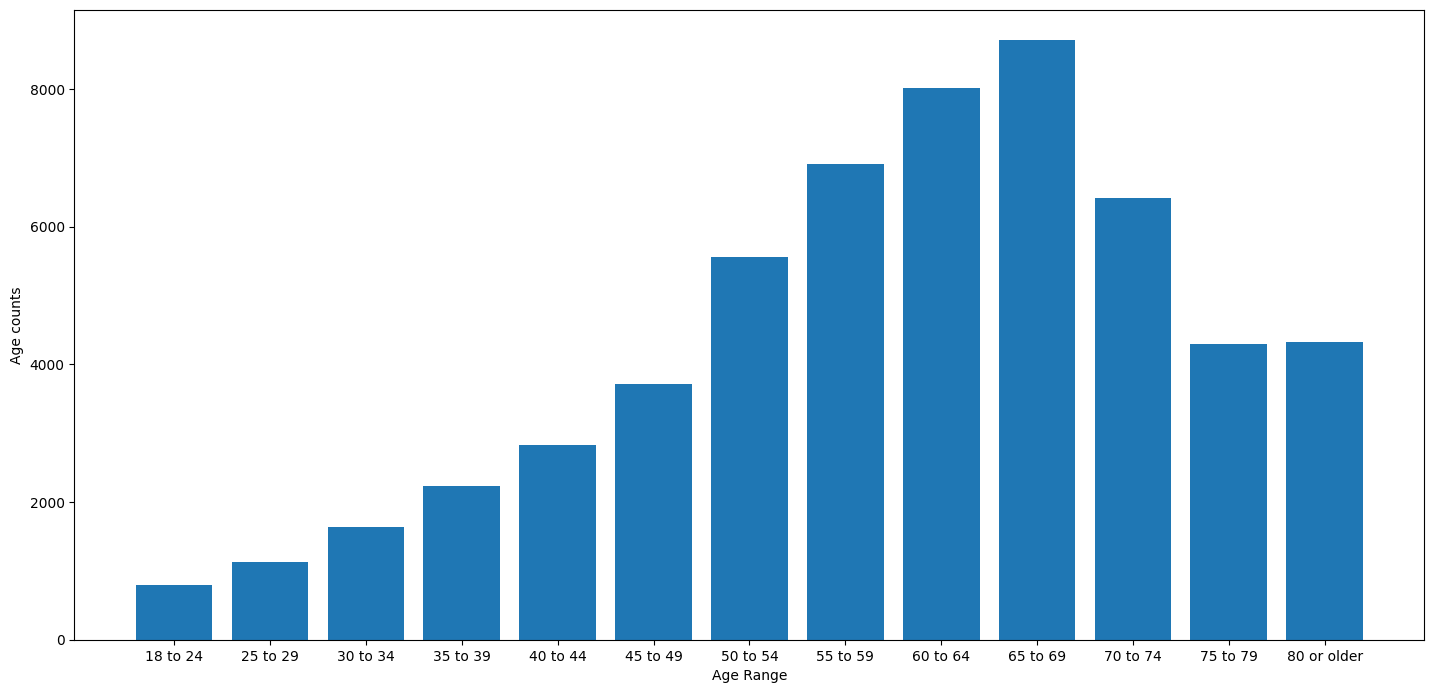

In [10]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(labels,age_count.values)

plt.show()

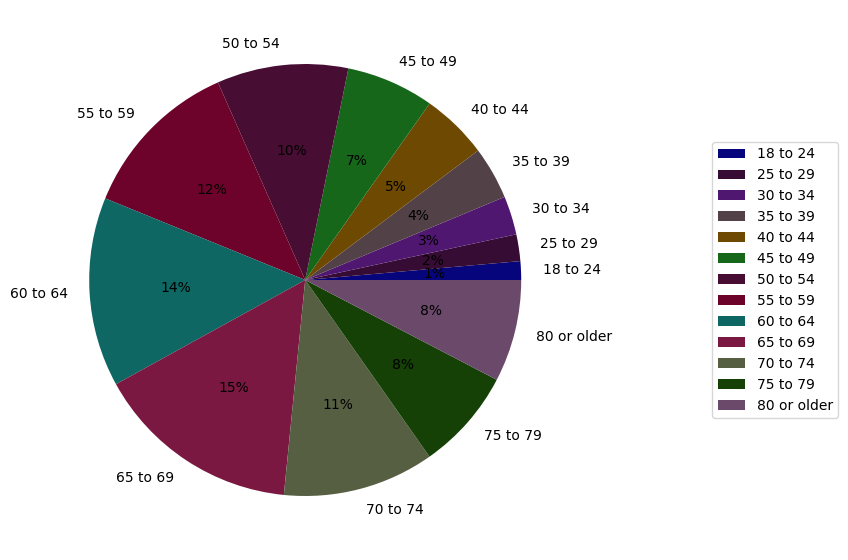

In [11]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=labels,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,labels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [12]:
age_diabetes_distribution =(
    diabetes_train.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,0.0,1.0
Age,,
1.0,728,61
2.0,1013,116
3.0,1383,252
4.0,1744,487
5.0,1981,847
6.0,2337,1376
7.0,3052,2505
8.0,3473,3434
9.0,3457,4561


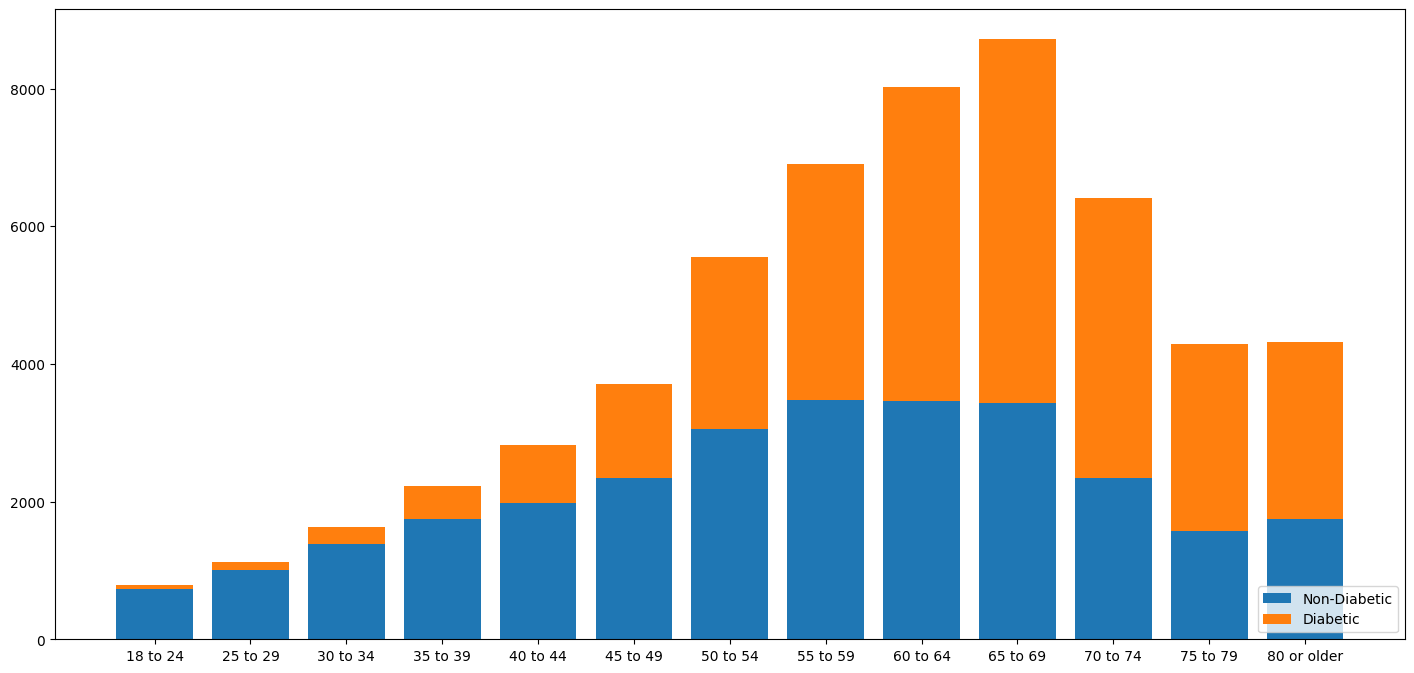

In [13]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(labels,age_diabetes_distribution [0],label="Non-Diabetic")
age_axes.bar(labels,age_diabetes_distribution [1],label="Diabetic",bottom=age_diabetes_distribution [0])
plt.legend(loc="lower right")


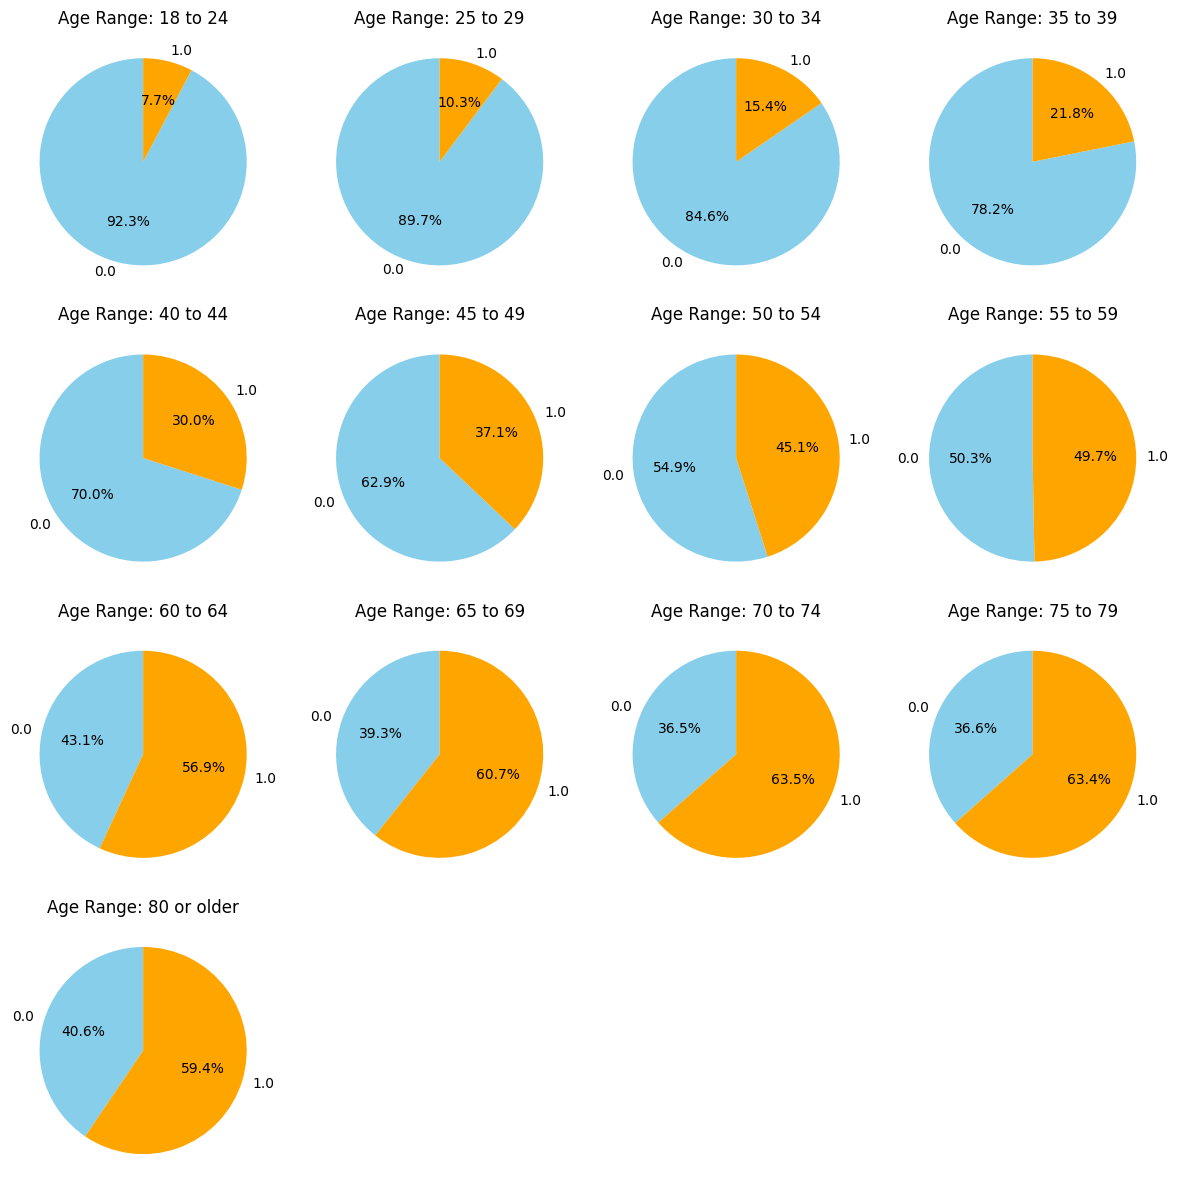

In [14]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(labels):
    data = age_diabetes_percentage.loc[labels.index(age_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [15]:
diabetes_train["Education"].describe()

count    56553.000000
mean         4.922551
std          1.030487
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Education, dtype: float64

In [16]:
education_count=diabetes_train["Education"].value_counts().sort_values()
education_count

Education
1.0       61
2.0     1322
3.0     2773
4.0    15525
5.0    15971
6.0    20901
Name: count, dtype: int64

In [17]:
education_levels = [
    "Never Attended School",
    "Elementary",
    "High School",
    "Some College Degree",
    "Advanced Degree",
    "6" 
]

<BarContainer object of 6 artists>

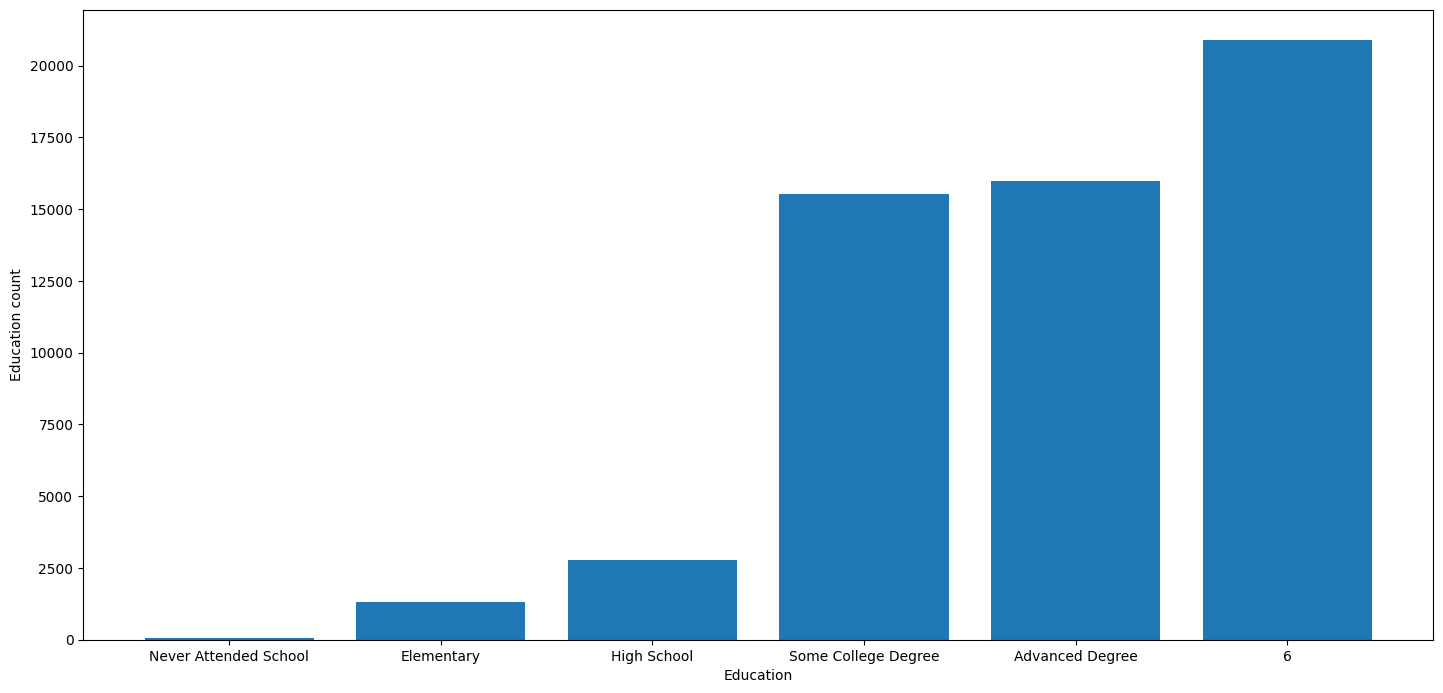

In [18]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_levels,education_count.values)

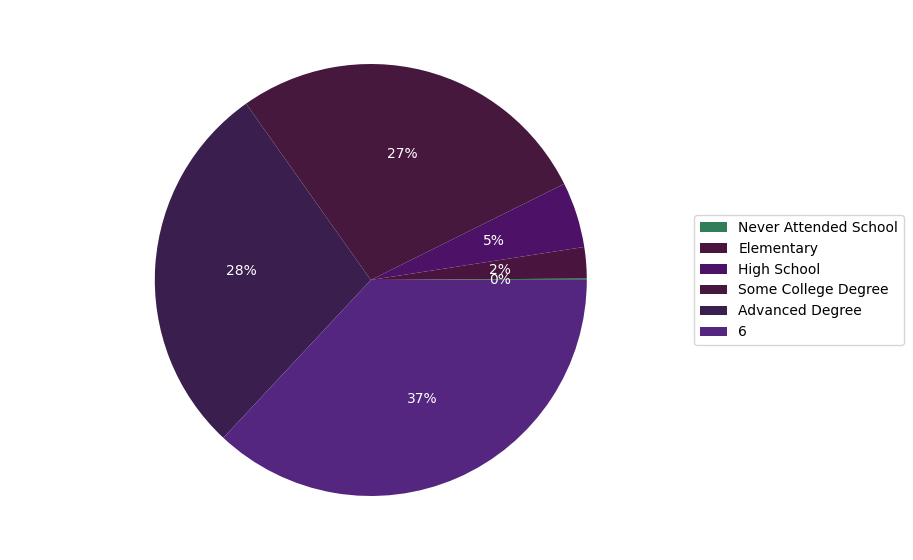

In [19]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_levels,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_levels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [20]:
education_diabetes_distribution =(
    diabetes_train.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,0.0,1.0
Education,,
1.0,26,35
2.0,370,952
3.0,920,1853
4.0,6720,8805
5.0,7731,8240
6.0,12489,8412


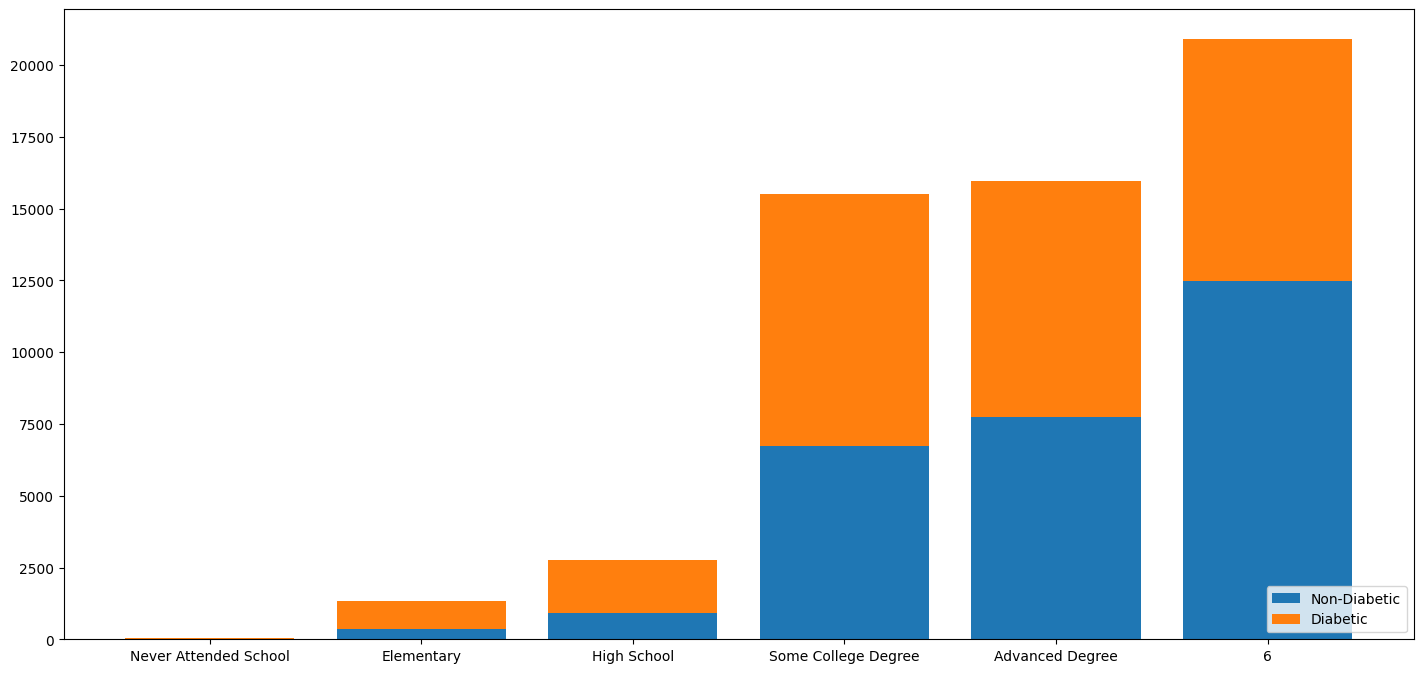

In [21]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_levels,education_diabetes_distribution [0],label="Non-Diabetic")
education_axes.bar(education_levels,education_diabetes_distribution [1],label="Diabetic",bottom=education_diabetes_distribution [0])
plt.legend(loc="lower right")

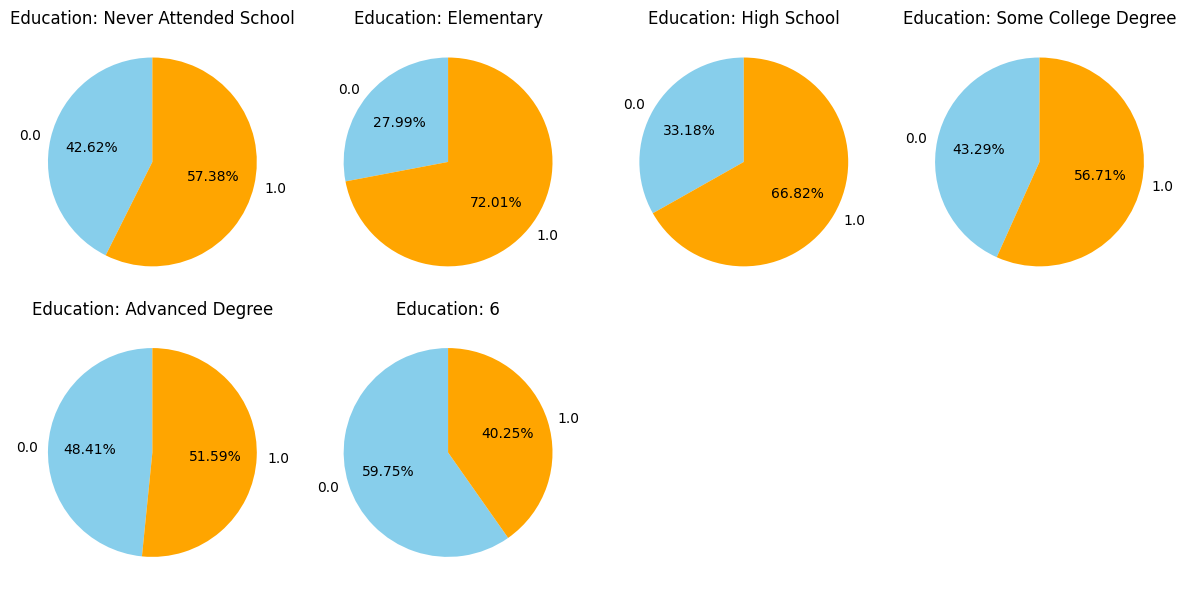

In [22]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_levels):
    data = education_diabetes_percentage.loc[education_levels.index(education_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [23]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

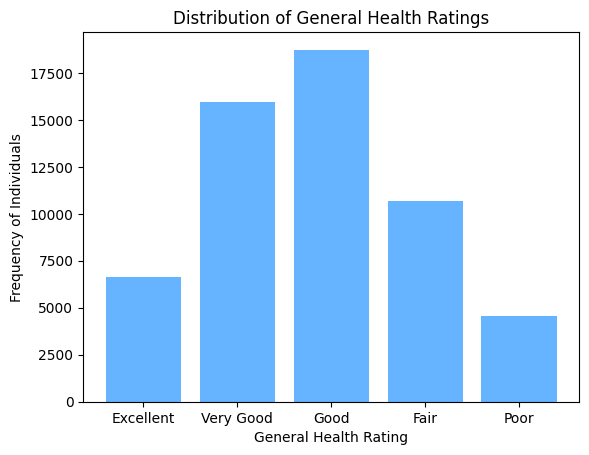

In [24]:
# Define the order of bins
ratings = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Calculate frequency and reindex
freq = diabetes_train["GenHlth"].value_counts().sort_index()

# Use bar chart instead of histogram
plt.bar(ratings, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart

a bar chart that shows each general health rating with its number of occurances

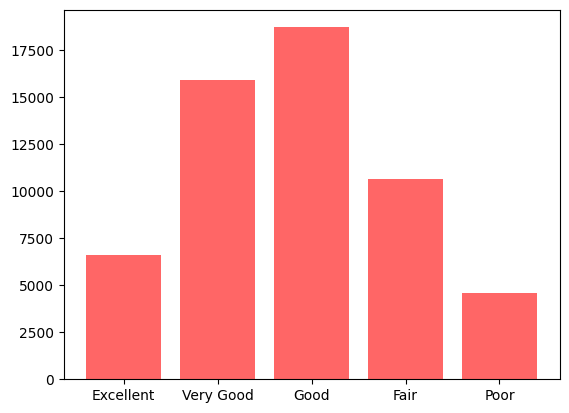

In [25]:
plt.bar(ratings, freq.values, color=colors[1])
plt.show()

a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

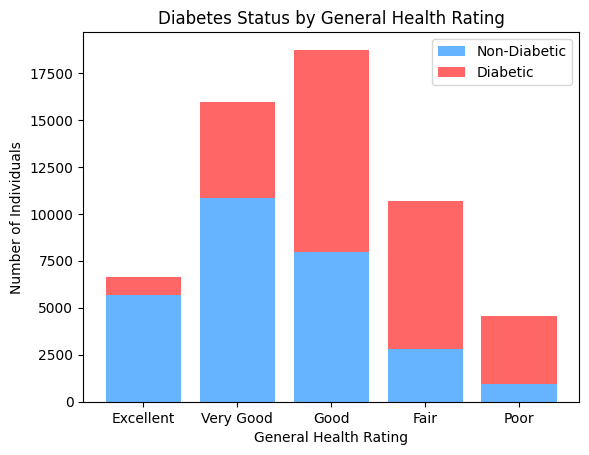

GenHlth  Diabetes_binary
1.0      0.0                 5704
         1.0                  926
2.0      0.0                10826
         1.0                 5124
3.0      0.0                 7965
         1.0                10766
4.0      0.0                 2792
         1.0                 7866
5.0      0.0                  969
         1.0                 3615
dtype: int64

In [26]:
group_sizes = diabetes_train.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i][1]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i][0]) for i in freq.index]

plt.bar(ratings, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(ratings, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

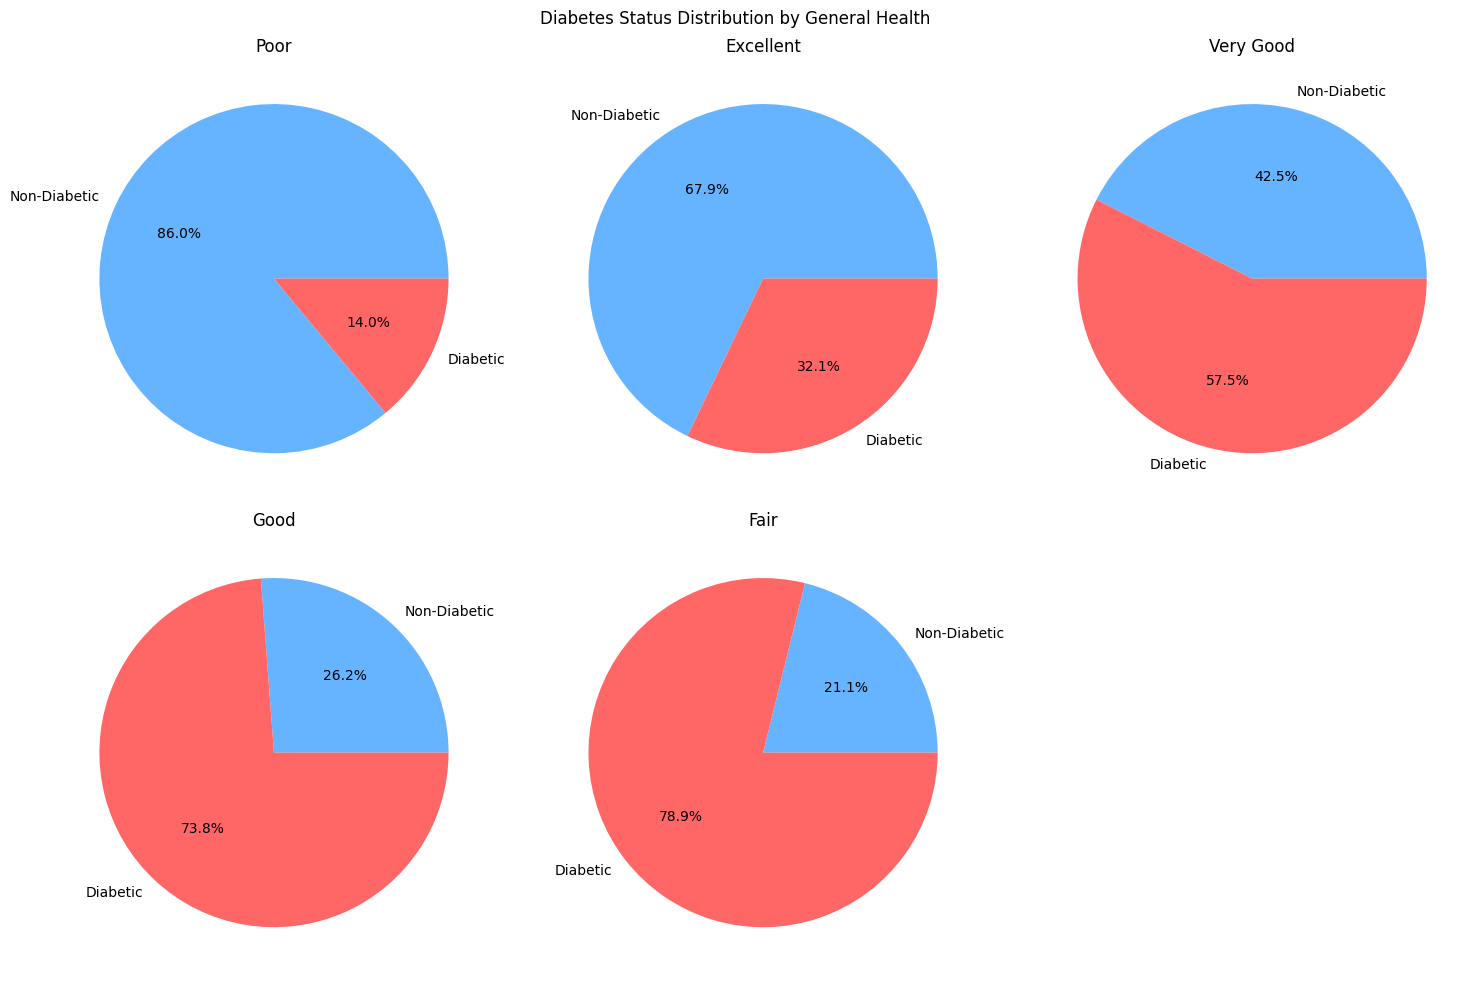

In [27]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(freq.index):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating][0]), int(group_sizes[rating][1])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(ratings[i-1])  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [28]:
bmi_count=diabetes_train["BMI"].value_counts().sort_index()

bmi_count

BMI
12.0     1
13.0     5
14.0     5
15.0    23
16.0    51
        ..
87.0    11
89.0     4
92.0     8
95.0     3
98.0     2
Name: count, Length: 76, dtype: int64

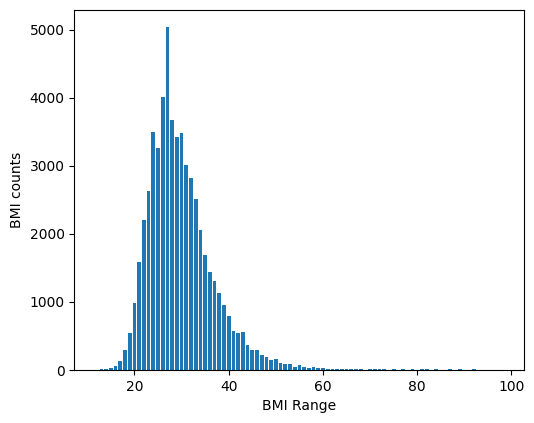

In [29]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

In [30]:
def remove_outliers(df, column_name):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for acceptable values
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the value in the specified column is an outlier
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered

diabetes_train = remove_outliers(diabetes_train, "BMI")

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [31]:
diabetes_train["Veggies"].value_counts()

Veggies
1.0    43339
0.0    11467
Name: count, dtype: int64

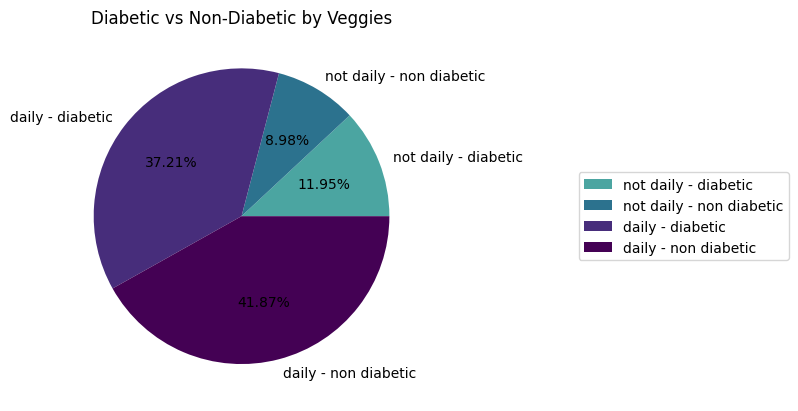

In [32]:
grouped_by_veggies = diabetes_train.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0][1], grouped_by_veggies[0][0], grouped_by_veggies[1][1], grouped_by_veggies[1][0]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [33]:
diabetes_train["Fruits"].value_counts()

Fruits
1.0    33790
0.0    21016
Name: count, dtype: int64

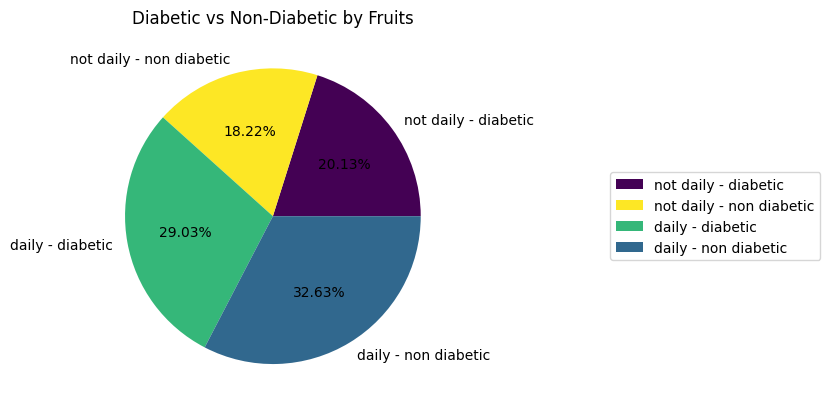

In [34]:
grouped_by_fruits = diabetes_train.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0][1], grouped_by_fruits[0][0], grouped_by_fruits[1][1], grouped_by_fruits[1][0]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


### Drop ID,Income,and Education Columns

In [35]:
deleted_columns=["Income","Education","GenHlth","CholCheck","NoDocbcCost","AnyHealthcare"]

diabetes_train.drop(columns=deleted_columns,inplace=True)
diabetes_test.drop(columns=deleted_columns,inplace=True)

diabetes_train

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,Sex,Age
61789,1.0,1.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,11.0
46280,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,11.0
18465,0.0,1.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,27.0,1.0,0.0,8.0
45540,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
28119,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0
6265,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0
54886,1.0,1.0,1.0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,11.0
860,0.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0


### Correlation Coefficient

In [36]:
corr_matrix = diabetes_train.select_dtypes(include=[np.number]).corr()

corr_matrix

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_binary,1.000000,0.380646,0.287261,0.307396,0.087630,0.125096,0.212626,-0.150088,-0.052613,-0.081705,-0.095100,0.080023,0.205299,0.263251,0.049174,0.288475
HighBP,0.380646,1.000000,0.318591,0.258312,0.089032,0.129929,0.211062,-0.130016,-0.035664,-0.064796,-0.026634,0.058526,0.167031,0.226220,0.043987,0.348779
HighChol,0.287261,0.318591,1.000000,0.147153,0.093525,0.099364,0.181342,-0.085662,-0.043658,-0.042896,-0.024561,0.079038,0.138698,0.157324,0.018039,0.250246
BMI,0.307396,0.258312,0.147153,1.000000,0.019752,0.020967,0.070053,-0.153481,-0.083581,-0.059913,-0.058808,0.080893,0.126004,0.207567,0.031455,-0.005960
Smoker,0.087630,0.089032,0.093525,0.019752,1.000000,0.063080,0.123312,-0.080730,-0.075485,-0.029340,0.078586,0.092673,0.124031,0.124897,0.109692,0.105262
Stroke,0.125096,0.129929,0.099364,0.020967,0.063080,1.000000,0.217925,-0.079116,-0.009039,-0.045159,-0.021910,0.084246,0.161888,0.193534,-0.000215,0.126227
HeartDiseaseorAttack,0.212626,0.211062,0.181342,0.070053,0.123312,0.217925,1.000000,-0.090756,-0.019357,-0.033477,-0.038761,0.069655,0.191757,0.233353,0.097415,0.223852
PhysActivity,-0.150088,-0.130016,-0.085662,-0.153481,-0.080730,-0.079116,-0.090756,1.000000,0.131822,0.146439,0.018269,-0.126068,-0.226399,-0.265526,0.049459,-0.103535
Fruits,-0.052613,-0.035664,-0.043658,-0.083581,-0.075485,-0.009039,-0.019357,0.131822,1.000000,0.235515,-0.034653,-0.057551,-0.039967,-0.046430,-0.091199,0.061634
Veggies,-0.081705,-0.064796,-0.042896,-0.059913,-0.029340,-0.045159,-0.033477,0.146439,0.235515,1.000000,0.020785,-0.052153,-0.063953,-0.082229,-0.055907,-0.019553


In [37]:
corr_matrix["Diabetes_binary"].sort_values(ascending=False)

Diabetes_binary         1.000000
HighBP                  0.380646
BMI                     0.307396
Age                     0.288475
HighChol                0.287261
DiffWalk                0.263251
HeartDiseaseorAttack    0.212626
PhysHlth                0.205299
Stroke                  0.125096
Smoker                  0.087630
MentHlth                0.080023
Sex                     0.049174
Fruits                 -0.052613
Veggies                -0.081705
HvyAlcoholConsump      -0.095100
PhysActivity           -0.150088
Name: Diabetes_binary, dtype: float64

## Feature Scaling

### Normalizing BMI (MinMaxScaler)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
diabetes_train[["BMI", "PhysHlth"]] = scaler.fit_transform(diabetes_train[["BMI", "PhysHlth"]])
diabetes_test[["BMI", "PhysHlth"]] = scaler.transform(diabetes_test[["BMI", "PhysHlth"]])

### Models

In [44]:
train_data=diabetes_train
test_data=diabetes_test
train_label=train_data["Diabetes_binary"]
test_label=test_data["Diabetes_binary"]
train_data=train_data.drop("Diabetes_binary",axis=1)
test_data=test_data.drop("Diabetes_binary",axis=1)

### LogisticRegression Model

In [51]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42,max_iter=200,C=0.5)
model=logistic_regression.fit(train_data,train_label)

prediction=logistic_regression.predict(test_data)

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {"C":[0.5,0.75,1,1.25,1.5,1.75,2],"max_iter":[100,200,300,400,500,600]},
]

grid_search=GridSearchCV(logistic_regression,param_grid,cv=5,return_train_score=True)
grid_search.fit(train_data,train_label)



C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=42),
             param_grid=[{'C': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
                          'max_iter': [100, 200, 300, 400, 500, 600]}],
             return_train_score=True)

In [47]:
grid_search.best_estimator_

LogisticRegression(C=0.5, max_iter=200, random_state=42)

In [48]:
grid_search.best_params_

{'C': 0.5, 'max_iter': 200}

In [50]:
cvresult=grid_search.cv_results_

for mean_score,params in zip(cvresult["mean_test_score"],cvresult["params"]):
    print(np.sqrt(mean_score),params)

0.8555700864983165 {'C': 0.5, 'max_iter': 100}
0.8555807497957697 {'C': 0.5, 'max_iter': 200}
0.8555807497957697 {'C': 0.5, 'max_iter': 300}
0.8555807497957697 {'C': 0.5, 'max_iter': 400}
0.8555807497957697 {'C': 0.5, 'max_iter': 500}
0.8555807497957697 {'C': 0.5, 'max_iter': 600}
0.8554741127857641 {'C': 0.75, 'max_iter': 100}
0.8554634481590873 {'C': 0.75, 'max_iter': 200}
0.8554634481590873 {'C': 0.75, 'max_iter': 300}
0.8554634481590873 {'C': 0.75, 'max_iter': 400}
0.8554634481590873 {'C': 0.75, 'max_iter': 500}
0.8554634481590873 {'C': 0.75, 'max_iter': 600}
0.855506103922472 {'C': 1, 'max_iter': 100}
0.8554954396945974 {'C': 1, 'max_iter': 200}
0.8554954396945974 {'C': 1, 'max_iter': 300}
0.8554954396945974 {'C': 1, 'max_iter': 400}
0.8554954396945974 {'C': 1, 'max_iter': 500}
0.8554954396945974 {'C': 1, 'max_iter': 600}
0.8554954358032292 {'C': 1.25, 'max_iter': 100}
0.8555061000311522 {'C': 1.25, 'max_iter': 200}
0.8555061000311522 {'C': 1.25, 'max_iter': 300}
0.855506100031152

In [53]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(logistic_regression,train_data,train_label,cv=5)
cross_val

array([0.73052363, 0.7312289 , 0.73323602, 0.73259739, 0.73250616])

### Metrics Function

In [54]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

def calculate_metrics(y_true, y_pred):
    metrics={
        "Accuracy":accuracy_score(y_true,y_pred),
        "F1 Score":f1_score(y_true,y_pred),
        "Precision":precision_score(y_true,y_pred),
        "Recall":recall_score(y_true,y_pred),
        "ROC AUC":roc_auc_score(y_true,y_pred)
    }
    return metrics

### Logistic Regression Metrics

In [55]:
logistic_regression_metrics=calculate_metrics(test_label,prediction)

logistic_regression_metrics

{'Accuracy': 0.7299667586109343,
 'F1 Score': np.float64(0.7348979308429385),
 'Precision': np.float64(0.7197062423500612),
 'Recall': np.float64(0.7507447864945382),
 'ROC AUC': np.float64(0.7300268361245611)}

### Save the logistic_regression model

In [56]:
import os

os.makedirs("../models", exist_ok=True)
os.makedirs("../metrics", exist_ok=True)

In [57]:
import joblib
joblib.dump(logistic_regression,'../models/logistic_regression.pkl')


['../models/logistic_regression.pkl']

In [58]:
import json

with open("../metrics/logistic_regression.json","w") as f:
    json.dump(logistic_regression_metrics,f)

### Support Vector Machine

In [80]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf',C=10,gamma=0.1)
model=svc.fit(train_data,train_label)

prediction=svc.predict(test_data)

In [81]:
cross_val=cross_val_score(svc,train_data,train_label,cv=10)
cross_val

array([0.72851669, 0.71720489, 0.71428571, 0.72614486, 0.72340814,
       0.73161832, 0.73631387, 0.71423358, 0.71879562, 0.72864964])

### SVM Metrics

In [82]:
svm_metrics=calculate_metrics(test_label,prediction)

svm_metrics

{'Accuracy': 0.7209845109272226,
 'F1 Score': np.float64(0.7341465058292338),
 'Precision': np.float64(0.699229781771502),
 'Recall': np.float64(0.7727337210951908),
 'ROC AUC': np.float64(0.7211341384037308)}

In [83]:
import joblib
joblib.dump(logistic_regression,'../models/svm.pkl')

['../models/svm.pkl']

In [84]:
import json

with open("../metrics/svm.json","w") as f:
    json.dump(svm_metrics,f)

### Desision Tree Model

In [85]:
from sklearn.tree import DecisionTreeClassifier

decision_tree=DecisionTreeClassifier(random_state=42,min_samples_leaf=13,criterion='entropy',max_depth=9)

decision_tree.fit(train_data,train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=13,
                       random_state=42)

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, 
                           cv=5, verbose=True)
grid_search.fit(train_data, train_label)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.7228588360107948
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=13,
                       random_state=42)


C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [86]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(decision_tree,train_data,train_label,cv=5)
cross_val

array([0.72149243, 0.7200073 , 0.72721467, 0.72447769, 0.72110209])

In [100]:
prediction=decision_tree.predict(test_data)

decision_tree_metrics=calculate_metrics(test_label,prediction)
decision_tree_metrics

{'Accuracy': 0.7319470966829338,
 'F1 Score': np.float64(0.742876526458616),
 'Precision': np.float64(0.7118710180730724),
 'Recall': np.float64(0.7767059157327281),
 'ROC AUC': np.float64(0.7320765121681976)}

In [88]:
import joblib
joblib.dump(decision_tree,'../models/decision_tree.pkl')

['../models/decision_tree.pkl']

In [89]:
import json
with open("../metrics/decision_tree.json","w") as f:
    json.dump(decision_tree_metrics,f)

### Random Forest model

In [90]:
 param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider for a split
    'bootstrap': [True, False]               # Whether to use bootstrap samples
}

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(train_data, train_label)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.7327117601821961


In [102]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,bootstrap= True, max_depth=10,
max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 100)


random_forest.fit(train_data, train_label)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [103]:
prediction=random_forest.predict(test_data)

random_forest_metrics=calculate_metrics(test_label,prediction)
random_forest_metrics

{'Accuracy': 0.7319470966829338,
 'F1 Score': np.float64(0.742876526458616),
 'Precision': np.float64(0.7118710180730724),
 'Recall': np.float64(0.7767059157327281),
 'ROC AUC': np.float64(0.7320765121681976)}

In [104]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(random_forest,train_data,train_label,cv=5)
cross_val

array([0.73198321, 0.7312289 , 0.73551683, 0.73305355, 0.7317763 ])

In [106]:
import joblib
joblib.dump(random_forest,'../models/random_forest.pkl')

['../models/random_forest.pkl']

In [107]:
import json

with open("../metrics/random_forest.json","w") as f:
    json.dump(random_forest_metrics,f)